In [1]:
from dataset_loader import load_from_file
from tabulate import tabulate
from matplotlib.pyplot import figure, imshow, axis
from commons import *

# obrót do poziomu, metodami:
# 1. hough lines
# 2. tomkowe
# 3. tamtą pierwszą biblioteką od eliciticy
# informacja wzjaemna - między jednym obrazkiem a porównywanym
# jeszcze te metryki: https://towardsdatascience.com/measuring-similarity-in-two-images-using-python-b72233eb53c6


DOTS_DST = 'cache/dots_v2.pickle'
TRACKS_DST = 'cache/tracks_v2.pickle'
WORMS_DST = 'cache/worms_v2.pickle'
ARTIFACTS_DST = 'cache/artifacts_v2.pickle'

DOTS_DSTx4 = 'cache/dots_v3.pickle'
TRACKS_DSTx4 = 'cache/tracks_v3.pickle'
WORMS_DSTx4 = 'cache/worms_v3.pickle'
ARTIFACTS_DSTx4 = 'cache/artifacts_v3.pickle'


tf_classes = [ tf.keras.metrics.AUC,
    tf.keras.metrics.Accuracy,
    tf.keras.metrics.BinaryAccuracy,
    tf.keras.metrics.BinaryCrossentropy,
    tf.keras.metrics.BinaryIoU,
    tf.keras.metrics.CategoricalAccuracy,
    tf.keras.metrics.CategoricalCrossentropy,
    tf.keras.metrics.CategoricalHinge,
    tf.keras.metrics.CosineSimilarity,
    tf.keras.metrics.FalseNegatives,
    tf.keras.metrics.FalsePositives,
    tf.keras.metrics.Hinge,
    #tf.keras.metrics.IoU,
    tf.keras.metrics.KLDivergence,
    tf.keras.metrics.LogCoshError,
    tf.keras.metrics.Mean,
    tf.keras.metrics.MeanAbsoluteError,
    tf.keras.metrics.MeanAbsolutePercentageError,
    #tf.keras.metrics.MeanIoU,
    #tf.keras.metrics.MeanMetricWrapper,
    #tf.keras.metrics.MeanRelativeError,
    tf.keras.metrics.MeanSquaredError,
    tf.keras.metrics.MeanSquaredLogarithmicError,
    #tf.keras.metrics.MeanTensor,
    #tf.keras.metrics.Metric,
    #tf.keras.metrics.OneHotIoU,
    #tf.keras.metrics.OneHotMeanIoU,
    tf.keras.metrics.Poisson,
    tf.keras.metrics.Precision,
    #tf.keras.metrics.PrecisionAtRecall,
    tf.keras.metrics.Recall,
    #tf.keras.metrics.RecallAtPrecision,
    tf.keras.metrics.RootMeanSquaredError,
    #tf.keras.metrics.SensitivityAtSpecificity,
    tf.keras.metrics.SparseCategoricalAccuracy,
    tf.keras.metrics.SparseCategoricalCrossentropy,
    tf.keras.metrics.SparseTopKCategoricalAccuracy,
    #tf.keras.metrics.SpecificityAtSensitivity,
    tf.keras.metrics.SquaredHinge,
    tf.keras.metrics.Sum,
    tf.keras.metrics.TopKCategoricalAccuracy,
    tf.keras.metrics.TrueNegatives,
    tf.keras.metrics.TruePositives ]

def generic_tf_metrics(cls):
    def tf_metrics(image, recon):
        m = cls()
        m.update_state(image, recon)
        return m.result().numpy()
    return tf_metrics, cls.__name__

tf_mean = generic_tf_metrics(tf.keras.metrics.Mean)


def tf_kl_divergence(image, recon):
    m = tf.keras.metrics.KLDivergence()
    m.update_state(image, recon)
    return m.result().numpy()


def tf_accuracy(image, recon):
    m = tf.keras.metrics.Accuracy()
    m.update_state(image, recon)
    return m.result().numpy()

def tf_mse(image, recon):
    m = tf.keras.metrics.MeanSquaredError()
    m.update_state(image, recon)
    return m.result().numpy()




funcs = [
    (dm_func_mean2, 'mean'),
    (dm_func_avg_hash, 'avg_hash'),
    (dm_func_p_hash, 'p_hash'),
    (dm_func_d_hash,  'd_hash'),
    (dm_func_haar_hash,  'haar_hash'),
    (dm_func_db4_hash, 'db4_hash')
] #, tf_kl_divergence, tf_accuracy, tf_mse]
for c in tf_classes:
    funcs.append(generic_tf_metrics(c))


def showImagesMatrix(images, col=10):

    hSize = 20
    wSize = 20

    fig = figure( figsize=(wSize, hSize))
    number_of_files = len(images)
    row = number_of_files // col
    if (number_of_files%col != 0):
        row += 1

    row_head = ['Image 0 vs image:']
    row_funcs = []

    for f, n in funcs:
        row_funcs.append([n])

    img0 = np.expand_dims(images[0], axis=-1)

    for i in range(number_of_files):
        row_head.append(str(i))
        a=fig.add_subplot(row,col,i+1)
        image = np.expand_dims(images[i], axis=-1)
        imshow(image,cmap='Greys_r')
        axis('off')

        #print('%010s | %6.3f' % ('dm_func_mean2', v))
        for fi, (f, n) in enumerate(funcs):
            v = f(img0, image)
            row_funcs[fi].append(str(v))

    table = [row_head, *row_funcs]
    print(tabulate(table))



images, augmented = load_from_file(TRACKS_DST)

-----------------------------  -------------  ----------------  --------------  ----------------  --------------
Image 0 vs image:                 0                1               2                 3               4
mean                              0               -6.83921        -6.34072          -8.40876        -6.34016
avg_hash                          0                0               0                 0               0
p_hash                            0                0.0221607       0.0886427         0.0886427       0.0886427
d_hash                            0                0               0                 0.00277008      0.00277008
haar_hash                         0                0.0470914       0.0941828         0.0498615       0.116343
db4_hash                          0                0.102493        0.238227          0.119114        0.354571
AUC                               1                0.708616        0.603235          0.815224        0.603235
Accuracy           

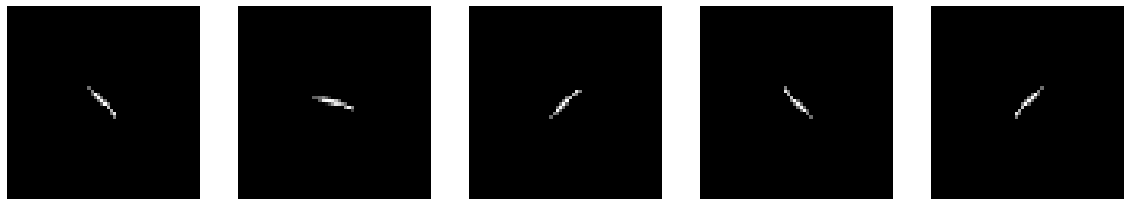

In [2]:
showImagesMatrix([images[0], augmented[0], augmented[2], augmented[5], augmented[16]], 5)

-----------------------------  -------------  ----------------  ----------------  ----------------  --------------
Image 0 vs image:                 0                1                 2                 3               4
mean                              0               -7.01052          -7.81738          -7.42434        -6.12148
avg_hash                          0                0                 0                 0.00277008      0.00554017
p_hash                            0                0.0110803         0                 0.0886427       0.0609418
d_hash                            0                0.00277008        0                 0.00554017      0.00831025
haar_hash                         0                0.0166205         0.0415512         0.0443213       0.0581717
db4_hash                          0                0.113573          0.110803          0.246537        0.199446
AUC                               1                0.656859          0.762783          0.709542        

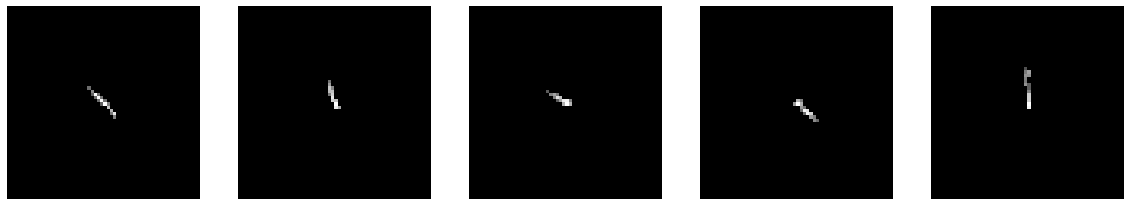

In [3]:
showImagesMatrix([images[0], images[1], images[2], images[3], images[4]], 5)

-----------------------------  --------------  ---------------  ----------------  ----------------  ----------------
Image 0 vs image:                 0                1                 2                 3                 4
mean                              0               -5.80507          -2.68695          -2.68695          -2.68695
avg_hash                          0                0                 0                 0                 0
p_hash                            0                0                 8                 8                 8
d_hash                            0                0                 0                 0                 0
haar_hash                         0                2.75              8.25             10.5               4.5
db4_hash                          0                4.25             11.25             19                 9
AUC                               1                0.749861          0.499722          0.499722          0.499722
Accuracy    

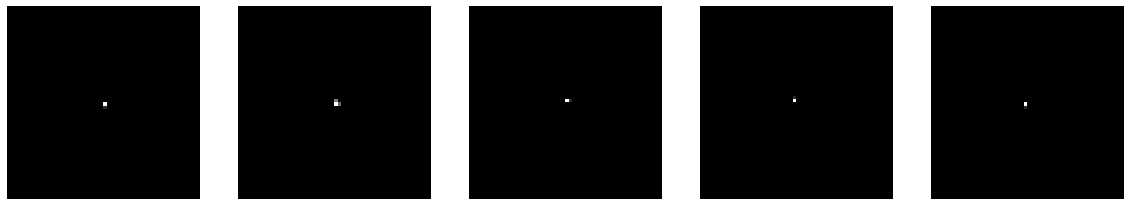

In [4]:
images_dots, augmented_dots = load_from_file(DOTS_DST)

showImagesMatrix([images_dots[0], augmented_dots[0], augmented_dots[2], augmented_dots[5], augmented_dots[16]], 5)

-----------------------------  --------------  ----------------  ----------------  ----------------  ----------------
Image 0 vs image:                 0                 1                 2                 3                 4
mean                              0                -3.55451          -4.05199          -1.41303          -1.65024
avg_hash                          0                 0                 0                 0                 0
p_hash                            0                 0                 0                 0                 1
d_hash                            0                 0                 0                 0                 0
haar_hash                         0                 2.75              3.5               5.75              5.75
db4_hash                          0                 4                 7.75              6                 9.75
AUC                               1                 0.999861          0.999861          0.749791          0.999583

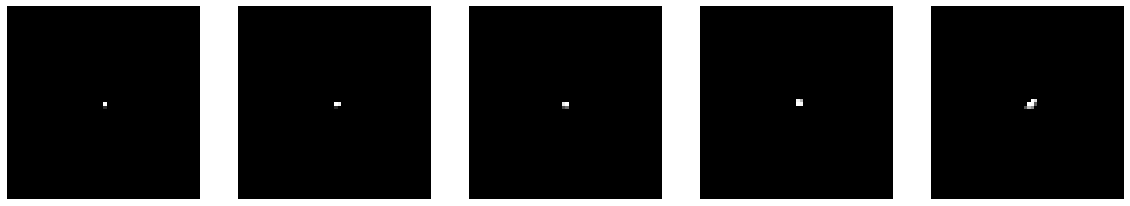

In [5]:
showImagesMatrix([images_dots[0], images_dots[1], images_dots[2], images_dots[3], images_dots[4]], 5)

-----------------------------  -------------  ----------------  --------------  --------------  --------------
Image 0 vs image:                 0                1               2               3               4
mean                              0              -11.274          -9.12119        -8.85051        -9.13759
avg_hash                          0                0.00110947      0.000739645     0.000739645     0.000739645
p_hash                            0                0               0.0118343       0.0118343       0.0118343
d_hash                            0                0               0.00147929      0.00221893      0.00147929
haar_hash                         0                0.000739645     0.00628698      0.0110947       0.0110947
db4_hash                          0                0.0122041       0.0188609       0.0358728       0.0236686
AUC                               1                0.893244        0.659215        0.551748        0.668899
Accuracy                 

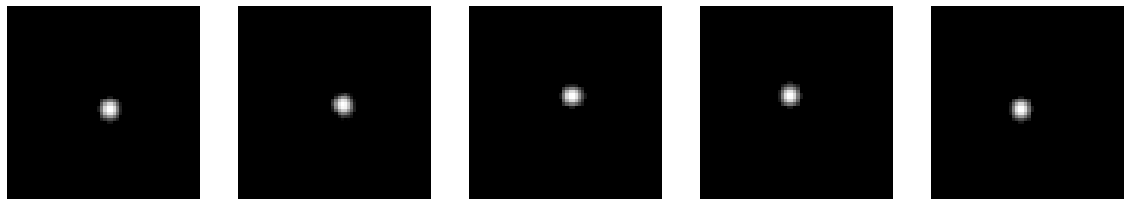

In [6]:
images_dots4x, augmented_dots4x = load_from_file(DOTS_DSTx4)
showImagesMatrix([images_dots4x[0], augmented_dots4x[0], augmented_dots4x[2], augmented_dots4x[5], augmented_dots4x[16]], 5)

-----------------------------  -------------  --------------  --------------  --------------  --------------
Image 0 vs image:                 0              1               2               3               4
mean                              0             -9.74587       -10.1547         -7.22731        -7.34377
avg_hash                          0              0.00110947      0.000369822     0.00110947      0.00184911
p_hash                            0              0               0               0               0.000739645
d_hash                            0              0.00110947      0.00184911      0.00184911      0.00258876
haar_hash                         0              0.000369822     0.00628698      0.00813609      0.00591716
db4_hash                          0              0.00850592      0.0199704       0.022929        0.0203402
AUC                               1              0.950118        0.940082        0.976518        0.992819
Accuracy                          1      

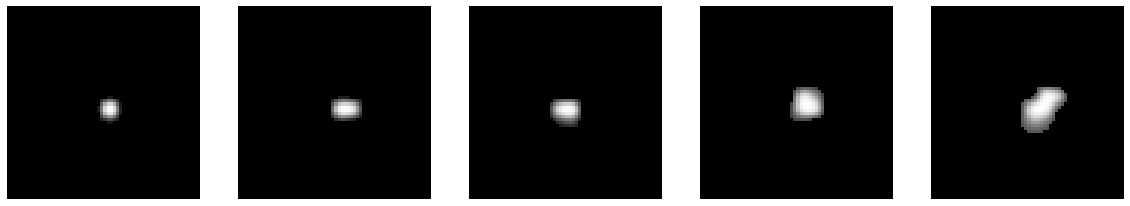

In [7]:
showImagesMatrix([images_dots4x[0], images_dots4x[1], images_dots4x[2], images_dots4x[3], images_dots4x[4]], 5)

-----------------------------  -------------  ----------------  --------------  --------------  --------------
Image 0 vs image:                 0                1               2               3               4
mean                              0               -9.00267        -7.7213         -7.18155        -7.62125
avg_hash                          0                0               0               0               0
p_hash                            0                0.0224          0.0512          0.0512          0.0512
d_hash                            0                0.0016          0.0048          0.0048          0.0016
haar_hash                         0                0.0048          0.008           0.0128          0.0064
db4_hash                          0                0.0464          0.1072          0.0656          0.048
AUC                               1                0.81845         0.637824        0.536727        0.657863
Accuracy                          1              

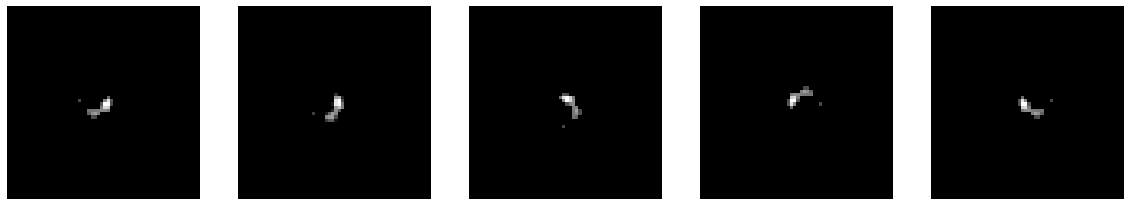

In [8]:
images_worms, augmented_worms = load_from_file(WORMS_DST)
showImagesMatrix([images_worms[0], augmented_worms[0], augmented_worms[2], augmented_worms[5], augmented_worms[16]], 5)

-----------------------------  -------------  ----------------  --------------  --------------  --------------
Image 0 vs image:                 0                1               2               3               4
mean                              0               -7.74534        -6.31735        -7.18328        -6.20656
avg_hash                          0                0               0.0032          0.0016          0
p_hash                            0                0.048           0.0096          0.048           0.0544
d_hash                            0                0.0016          0.0064          0.0064          0.0048
haar_hash                         0                0.0288          0.024           0.0352          0.0112
db4_hash                          0                0.0672          0.0592          0.1056          0.064
AUC                               1                0.658696        0.798255        0.61849         0.598221
Accuracy                          1              

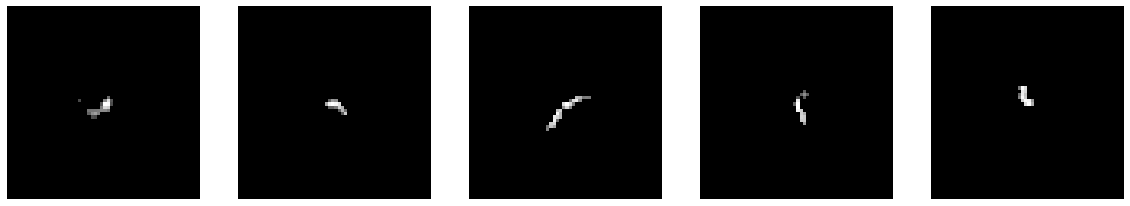

In [9]:
showImagesMatrix([images_worms[0], images_worms[1], images_worms[2], images_worms[3], images_worms[4]], 5)

-----------------------------  -------------  --------------  ---------------  --------------
Image 0 vs image:                 0              1                2               3
mean                              0             -6.72582         -7.24411        -6.52514
avg_hash                          0              0                0               0.00277008
p_hash                            0              0.0941828        0.0886427       0.0886427
d_hash                            0              0.00554017       0.00554017      0.00831025
haar_hash                         0              0.0581717        0.0831025       0.0775623
db4_hash                          0              0.221607         0.227147        0.274238
AUC                               1              0.629169         0.526184        0.758594
Accuracy                          1              0.989167         0.994444        0.983056
BinaryAccuracy                    0.994722       0.994722         0.994722        0.99472

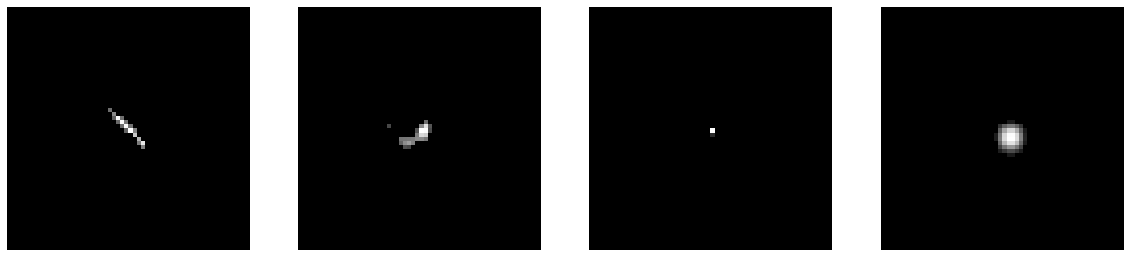

In [10]:
showImagesMatrix([images[0], images_worms[0], images_dots[0], images_dots4x[0][2:62,2:62]], 4)